<a href="https://colab.research.google.com/github/0yash4/Google-Colab/blob/main/SVM_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine(SVM)
## Classifier and Regressor


# Soft Margin SVM
### Using Gradient Descent with Hinge Loss
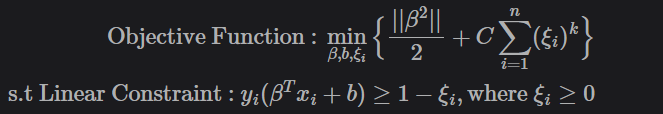

### Using Hinge Loss
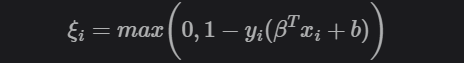

### Final Loss Function
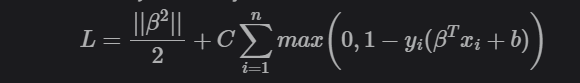

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
def get_hyperplane(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

def plot_svm(X, y, w, b, title ='Plot for linear SVM'):

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane(x0_1, w, b, 0)
    x1_2 = get_hyperplane(x0_2, w, b, 0)

    x1_1_m = get_hyperplane(x0_1, w, b, -1)
    x1_2_m = get_hyperplane(x0_2, w, b, -1)

    x1_1_p = get_hyperplane(x0_1, w, b, 1)
    x1_2_p = get_hyperplane(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])

    plt.title(title)
    plt.show()

In [ ]:
class SVMUsingGradientDescent:
  def __init__(self, C=1.0):
    self.C = C
    self.beta = None
    self.b = None

  def __decision_function(self, X):
        return X.dot(self.beta) + self.b

  def __cost(self, margin):
        return (1 / 2) * self.beta.dot(self.beta) + self.C * np.sum(np.maximum(0, 1 - margin))

  def __margin(self, X, y):
        return y * self.__decision_function(X)

  def fit(self, X, y, learning_rate=0.01, epoch=1000):
    row, col = X.shape
    self.beta = np.zeros(X.shape[1], dtype = np.float64)
    self.b = 0
    margin = self.__margin(X, y)
    misclassified_index = np.where(margin < 1)[0]
    for _ in range(epoch):
      d_beta = self.beta - self.C * np.sum(y[misclassified_index].dot(X[misclassified_index]))
      self.beta = self.beta - learning_rate * d_beta
      d_b = -self.C * np.sum(y[misclassified_index])
      self.b = self.b - learning_rate * d_b

    return self.beta, self.b

  def predict(self, X):
    return np.sign(self.__decision_function(X))


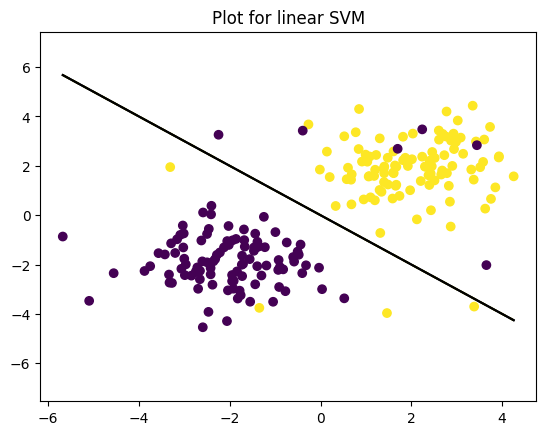

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def generate_svm_dataset_with_outliers(n_samples=200, n_features=2, noise=0.1, n_outliers=10, random_state=None):
    """
    Generate a dummy dataset for SVM testing with some outliers and boundary points.

    Parameters:
    - n_samples: Number of samples to generate
    - n_features: Number of features (default is 2 for easy visualization)
    - noise: Amount of noise to add to the dataset
    - n_outliers: Number of outlier points to add
    - random_state: Seed for random number generation

    Returns:
    - X: Feature matrix of shape (n_samples + n_outliers, n_features)
    - y: Target vector of shape (n_samples + n_outliers,)
    """
    if random_state is not None:
        np.random.seed(random_state)

    # Generate main cluster centers
    center1 = np.array([2, 2])
    center2 = np.array([-2, -2])

    # Generate samples for each class
    X1 = np.random.randn(n_samples // 2, n_features) + center1
    X2 = np.random.randn(n_samples - n_samples // 2, n_features) + center2

    # Combine samples and create labels
    X = np.vstack((X1, X2))
    y = np.hstack((np.ones(n_samples // 2), -np.ones(n_samples - n_samples // 2)))

    # Add some noise
    X += noise * np.random.randn(*X.shape)

    # Generate outliers
    outliers_X = np.random.uniform(low=-4, high=4, size=(n_outliers, n_features))
    outliers_y = np.random.choice([-1, 1], size=n_outliers)

    # Add outliers to the opposite classes
    outliers_y = -np.sign(outliers_X[:, 0] + outliers_X[:, 1])

    # Combine main data with outliers
    X = np.vstack((X, outliers_X))
    y = np.hstack((y, outliers_y))

    return X, y

X, y = generate_svm_dataset_with_outliers()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
svm = SVMUsingGradientDescent()

beta, b = svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
plot_svm(X, y, beta, b)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict, normalize=False)


66

In [ ]:
from sklearn.svm import LinearSVC
svm1 = LinearSVC(random_state=0, tol=1e-5)
svm1.fit(X_train, y_train)
y_predict1 = svm1.predict(X_test)
accuracy_score(y_test, y_predict1, normalize=False)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


66

# Soft Margin SVM
### Using Kernels


In [ ]:
class SVMUsingKernels:
  def __init__(self, C=1, sigma=0.1, degree=2, kernel="rbf"):
    if kernel=="poly":
      self.c = 1
      self.degree = degree
      self.kernel = self.poly_kernel
    else:
      self.sigma = sigma
      self.kernel = self.rbf_kernel
    self.beta = None
    self.b = None

  def poly_kernel(self, X1, X2):
    return (self.c + X1.dot(X2.T)) ** self.degree

  def rbf_kernel(self, X1, X2):
    return np.exp(-(np.linalg.norm(X1[:, np.newaxis] - X2[np.newaxis, :]) ** 2) / (2 * self.sigma ** 2))

  def fit(self, X, y, lr=0.01, epoch=1000):
    self.X = X
    self.y = y
    self.alpha = np.random.random(X.shape[0])
    self.b = 0
    self.ones = np.ones(X.shape[0])
    self.C = 1

    y_iy_jk_ij = np.outer(y, y) * self.kernel(X, X)
    losses = []
    for _ in range(epoch):
      gradient = self.ones - y_iy_jk_ij.dot(self.alpha)
      self.alpha = self.alpha + lr * gradient
      self.alpha[self.alpha > self.C] = self.C
      self.alpha[self.alpha < 0] = 0
              #                                        (500,500)                            (500,500)
      loss = np.sum(self.alpha) - 0.5 * np.sum(np.outer(self.alpha, self.alpha) * y_iy_jk_ij)
      losses.append(loss)
      index = np.where((self.alpha) > 0 & (self.alpha < self.C))[0]
      #(m,)= (m,)       (n,).(n,m)= (m,)
      b_i = y[index] - (self.alpha * y).dot(self.kernel(X, X[index]))
      self.b = np.mean(b_i)

  def decision_function(self, X):
      return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b

  def predict(self, X):
      return np.sign(self.decision_function(X))

  def score(self, X, y):
        y_hat = self.predict(X)
        return np.mean(y == y_hat)

  def plot_decision_boundary(self):
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, s=50, cmap=plt.cm.Paired, alpha=.7)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = self.decision_function(xy).reshape(XX.shape)

        # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors=['r', 'b', 'r'], levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'], linewidths=[2.0, 2.0, 2.0])

        # highlight the support vectors
        #ax.scatter(self.X[:, 0][self._support_vectors], self.X[:, 1][self._support_vectors], s=100,
                 #  linewidth=1, facecolors='none', edgecolors='k')

        plt.show()

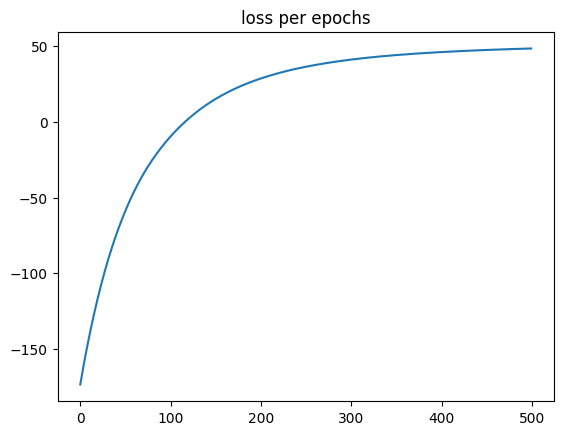

train score: 1.0


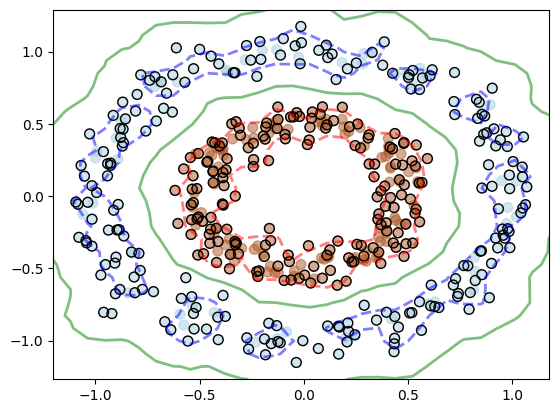

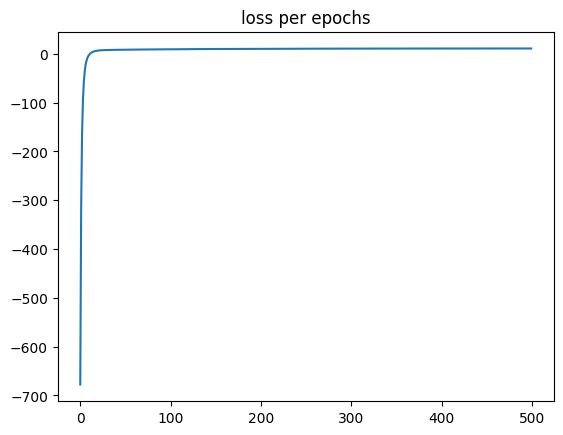

train score: 1.0


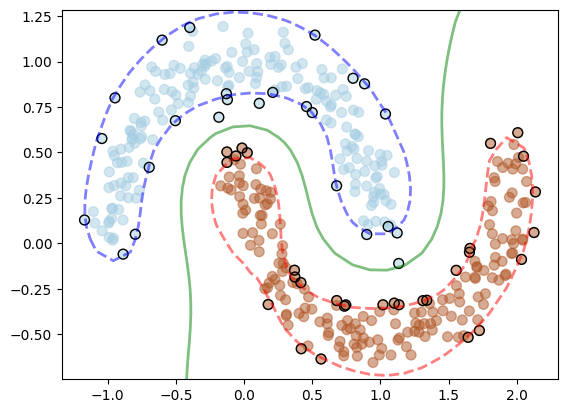

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


class SVMDualProblem:
    def __init__(self, C=1.0, kernel='rbf', sigma=0.1, degree=2):
        self.C = C
        if kernel == 'poly':
            self.kernel = self._polynomial_kernel
            self.c = 1
            self.degree = degree
        else:
            self.kernel = self._rbf_kernel
            self.sigma = sigma

        self.X = None
        self.y = None
        self.alpha = None
        self.b = 0
        self.ones = None

    def _rbf_kernel(self, X1, X2):
        return np.exp(-(1 / self.sigma ** 2) * np.linalg.norm(X1[:, np.newaxis] - X2[np.newaxis, :], axis=2) ** 2)

    def _polynomial_kernel(self, X1, X2):
        return (self.c + X1.dot(X2.T)) ** self.degree

    def fit(self, X, y, lr=1e-3, epochs=500):

        self.X = X
        self.y = y

        # (500,)
        self.alpha = np.random.random(X.shape[0])
        self.b = 0
        # (500,)
        self.ones = np.ones(X.shape[0])

        # (500,500) =      (500,500) *        (500,500)
        y_iy_jk_ij = np.outer(y, y) * self.kernel(X, X)

        losses = []
        for _ in range(epochs):
            # (500,)  =    (500,)      (500,500).(500,)=(500,)
            gradient = self.ones - y_iy_jk_ij.dot(self.alpha)
            # Same code
            # gradient = self.ones - np.sum(y_iy_jk_ij * self.alpha)

            self.alpha = self.alpha + lr * gradient

            self.alpha[self.alpha > self.C] = self.C
            self.alpha[self.alpha < 0] = 0

            #                                        (500,500)                            (500,500)
            loss = np.sum(self.alpha) - 0.5 * np.sum(np.outer(self.alpha, self.alpha) * y_iy_jk_ij)
            losses.append(loss)

        index = np.where((self.alpha) > 0 & (self.alpha < self.C))[0]
        # (m,)= (m,)       (n,).(n,m)= (m,)
        b_i = y[index] - (self.alpha * y).dot(self.kernel(X, X[index]))
        # Alternative code
        # b_i = y[index] - np.sum((self.alpha * y).reshape(-1, 1)*self.kernel(X, X[index]), axis=0)
        self.b = np.mean(b_i)

        plt.plot(losses)
        plt.title("loss per epochs")
        plt.show()

    def _decision_function(self, X):
        return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b

    def predict(self, X):
        return np.sign(self._decision_function(X))

    def score(self, X, y):
        y_hat = self.predict(X)
        return np.mean(y == y_hat)

    def plot_decision_boundary(self):
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, s=50, cmap=plt.cm.Paired, alpha=.5)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = self._decision_function(xy).reshape(XX.shape)

        # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors=['b', 'g', 'r'], levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'], linewidths=[2.0, 2.0, 2.0])

        # highlight the support vectors
        ax.scatter(self.X[:, 0][self.alpha > 0.], self.X[:, 1][self.alpha > 0.], s=50,
                   linewidth=1, facecolors='none', edgecolors='k')

        plt.show()


class SampleData:
    def get_moon(self, n_samples, noise=0.05):
        noisy_moons = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=6)
        return noisy_moons[0], noisy_moons[1]

    def get_donut(self, n_samples, noise=0.05, factor=0.5):
        noisy_circles = datasets.make_circles(n_samples=n_samples, factor=factor, noise=noise)
        return noisy_circles[0], noisy_circles[1]

    def get_blobs(self, n_samples, noise=0.05, factor=0.5):
        noisy_blobs = datasets.make_blobs(n_samples=n_samples)
        return noisy_blobs[0], noisy_blobs[1]

    def plot(self, X, y):
        ax = plt.gca()
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
        plt.show()


if __name__ == '__main__':
    sample = SampleData()
    X, y = sample.get_donut(n_samples=500, noise=0.08)
    y[y == 0] = -1

    svm = SVMDualProblem(C=1.0, kernel='rbf', degree=2)
    svm.fit(X, y, lr=1e-3)
    print("train score:", svm.score(X, y))
    svm.plot_decision_boundary()

    X, y = sample.get_moon(n_samples=400, noise=0.1)
    y[y == 0] = -1

    svm = SVMDualProblem(C=1.0, kernel='rbf', sigma=0.5)
    svm.fit(X, y, lr=1e-2)
    print("train score:", svm.score(X, y))
    svm.plot_decision_boundary()

In [ ]:
from sklearn import datasets
class SampleData:
    def get_moon(self, n_samples, noise=0.05):
        noisy_moons = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=6)
        return noisy_moons[0], noisy_moons[1]

    def get_donut(self, n_samples, noise=0.05, factor=0.5):
        noisy_circles = datasets.make_circles(n_samples=n_samples, factor=factor, noise=noise)
        return noisy_circles[0], noisy_circles[1]

    def plot(self, X, y):
        ax = plt.gca()
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
        plt.show()

train score: 0.0


ValueError: cannot reshape array of size 500 into shape (30,30)

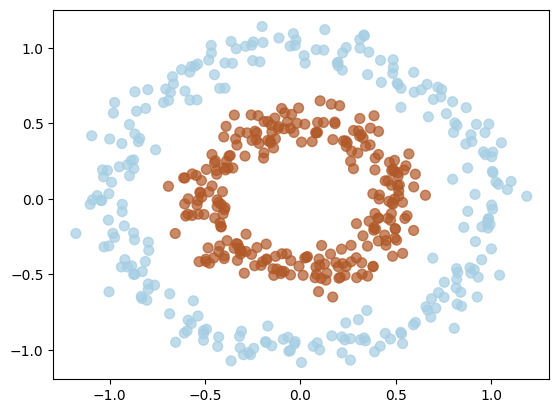

In [ ]:
if __name__ == '__main__':
    sample = SampleData()
    X, y = sample.get_donut(n_samples=500, noise=0.08)
    y[y == 0] = -1

    svm = SVMUsingKernels(C=1.0, kernel='rbf', degree=2)
    svm.fit(X, y, lr=1e-3)
    print("train score:", svm.score(X, y))
    svm.plot_decision_boundary()

    X, y = sample.get_moon(n_samples=400, noise=0.1)
    y[y == 0] = -1

    svm = SVMUsingKernels(C=1.0, kernel='poly', sigma=0.5)
    svm.fit(X, y, lr=1e-2)
    print("train score:", svm.score(X, y))
    svm.plot_decision_boundary()